## Анализ опроса о необходимости внедрения системы автоматизации документооборота

### Дизайн исследования

#### Гипотеза

&emsp; Из-за ручного заполнения большого количества документов сотрудники часто совершают ошибки, что приводит к необходимости переделывать файлы. \
&emsp; Это вызывает задержки в заключении договоров с партнёрами и увеличивает риск потери успешных проектов. \
&emsp; Кроме того, постоянная необходимость исправлять документы приводит к усталости сотрудников, что снижает их продуктивность и отвлекает от выполнения более важных задач.

#### Цели

* Определить, действительно ли сотрудники и партнёры испытывают трудности при составлении документов.
* Оценить, сможет ли система автоматизации документооборота решить эти проблемы.

#### Задачи

* Провести опрос среди сотрудников компании для получения их мнений и оценок текущего состояния документооборота.
* Выявить основные проблемы и точки роста по корпоративному документообороту из полученных данных.
* Определить, насколько автоматизация может улучшить рабочие процессы и снизить затраты.
* Разработать рекомендации по внедрению системы автоматизации на основе анализа данных.

#### Методология

&emsp; Для достижения поставленной цели будет использован количественный метод исследования. Опрос будет проводиться среди различных подразделений компании, \
&emsp; чтобы получить репрезентативные данные. Вопросы будут направлены на выявление следующих аспектов:

* Частота использования документов.
* Время, затрачиваемое на обработку документов.
* Частота возникновения ошибок в документах.
* Уровень удовлетворенности текущим процессом документооборота.
* Влияние усталости на производительность.

#### Инструменты

* Анкета: Разработка анкеты для проведения опроса, включающей закрытые и открытые вопросы.
* Платформа для анкетирования: Использование Яндекс.Форм для проведения опроса, обеспечивающего удобный доступ и высокую степень участия сотрудников.
* Анализ данных: Применение Python с библиотеками Pandas и Matplotlib для обработки полученной информации.
* Отчетность: Подготовка отчетов в формате Jupyter Notebook и PowerPoint для представления результатов руководству и заинтересованным сторонам.

#### Примечание

&emsp; С целью соблюдения NDA предоставляется фрагмент для публичной демонстрации, который показывает работу по обработке и анализу данных.

### Импорт библиотек

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Характеристики датасета

Данные получены из сервиса Яндекс.Формы. Каждая запись – это уникальная заполненная анкета.

In [19]:
df = pd.read_csv('Опрос.csv', sep=';', encoding='utf-8')

\
В датасете осталась тестовая запись, которую мы не будем удалять. \
Сохраним ее для большей вариации анализа данных. \
Начнем с того, что заменим NaN на str для группировки в сводной таблице.

In [20]:
df['Музей'] = df['Музей'].fillna('Не указано')

\
Теперь посмотрим описание датасета.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
 #   Column                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                  --------------  ----- 
 0   ID                                                                                                                                                                      35 non-null     int64 
 1   Музей                                                                                                                                                                   35 non-null     object
 2   Ваша должность                                                                                              

In [27]:
df.head(3)

,ID,Музей,Ваша должность,Работаете ли Вы с составлением документов?,Сколько документов Вы составляете за неделю?,С какими проблемами Вы сталкиваетесь при составлении документов / Необходимость вносить повторяющуюся информацию в разные документы,С какими проблемами Вы сталкиваетесь при составлении документов / Отсутствие базы шаблонов и долгий поиск нужной формы документа,С какими проблемами Вы сталкиваетесь при составлении документов / Ошибки на этапе согласования и внесение правок задерживают процесс подготовки выставки / мероприятия,С какими проблемами Вы сталкиваетесь при составлении документов / Долгий процесс согласования документов,С какими проблемами Вы сталкиваетесь при составлении документов / Рутинная работа занимает много времени и не позволяет заниматься основной деятельностью,С какими проблемами Вы сталкиваетесь при составлении документов / Появляется чувство усталости и истощения при заполнении типовых документов,С какими проблемами Вы сталкиваетесь при составлении документов / Проблем не возникает,С какими проблемами Вы сталкиваетесь при составлении документов / Другое,Укажите другие проблемы
0,1627422744,Не указано,Куратор,Нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1660996475,Музей “A”,Заместитель начальника,Да,6 – 9,Необходимость вносить повторяющуюся информацию...,Отсутствие базы шаблонов и долгий поиск нужной...,Ошибки на этапе согласования и внесение правок...,NaN,Рутинная работа занимает много времени и не по...,Появляется чувство усталости и истощения при з...,Проблем не возникает,Другое,NaN
2,1664038256,Музей “B”,Методист,Да,1 – 2,Необходимость вносить повторяющуюся информацию...,Отсутствие базы шаблонов и долгий поиск нужной...,NaN,Долгий процесс согласования документов,NaN,NaN,NaN,Другое,Разная информация от разных отделов. В некотор...


### Анализ

#### 1. Сколько музеев прошло опрос

Посмотрим, сколько музеев прошло опрос. \
Для этого возьмем столбец 'Музей', очистим его от дубликатов, пропусков и значения "Не указано".

In [83]:
unique_museums_df = df['Музей']
unique_museums_df = unique_museums_df.drop_duplicates()
unique_museums_df = unique_museums_df.dropna()
unique_museums_df = unique_museums_df.drop(df[df['Музей'] == 'Не указано'].index)
unique_museums_df

1     Музей “A”
2     Музей “B”
3     Музей “C”
4     Музей “D”
5     Музей “E”
6     Музей “F”
8     Музей “G”
10    Музей “H”
11    Музей “I”
12    Музей “J”
13    Музей “K”
15    Музей “L”
16    Музей “M”
18    Музей “N”
19    Музей “O”
21    Музей “P”
22    Музей “Q”
26    Музей “R”
30    Музей “S”
31    Музей “T”
34    Музей “U”
Name: Музей, dtype: object

In [84]:
unique_museums_count = unique_museums_df.nunique()
print(f'Музеев прошло опрос: {unique_museums_count}')

Музеев прошло опрос: 21


**Ответ: 21 музей прошел опрос.**

#### 2. Какие музеи опрос не прошли

Теперь будет полезно узнать, какие музеи опрос не прошли. \
Эти данные можно будет учесть, например, в рейтинге вовлеченности.

Добавляем справочник с музеями, входящими в объединение.

In [38]:
museums_list_df = pd.read_csv('Музеи.csv', sep=';', encoding='utf-8')

\
Объединяем две таблицы по правому соединению и оставляем строки, которых нет в левой таблице.

In [39]:
merged_museums_df = pd.merge(unique_museums_df, museums_list_df, on='Музей', how='right', indicator=True)
result_mm_df = merged_museums_df[merged_museums_df['_merge'] == 'right_only']
result_mm_df['Музей']

21    Музей “W”
22    Музей “Y”
Name: Музей, dtype: object

**Ответ: опрос не прошли Музей "W" и Музей "Y".**

#### 3. Какие сотрудники заполнили анкету

Посмотрим, заполнение анкеты по должностям

In [110]:
position_pivot_df = df[['Ваша должность', 'ID']].groupby('Ваша должность').count().sort_values(by='ID', ascending=False)
position_pivot_df

,ID
Ваша должность,
Администратор,11
Методист,11
Начальник музея,9
Заместитель начальника,3
Куратор,1


\
Выведем резульат в барчарте

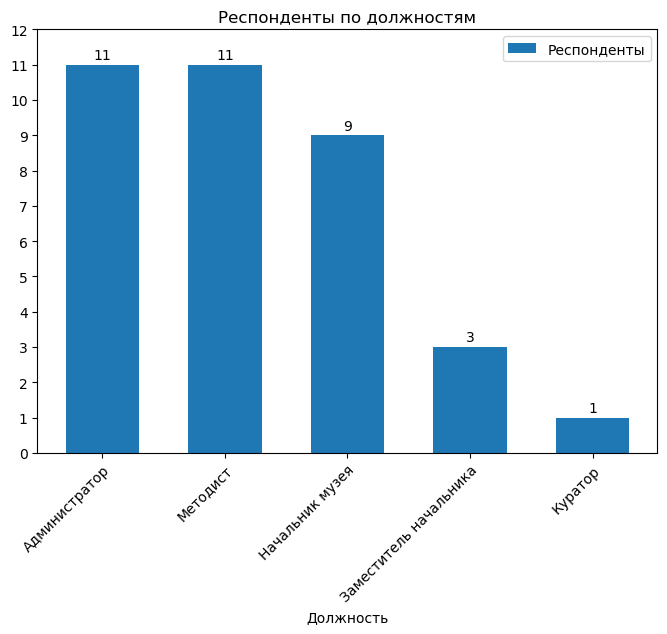

In [115]:
figsize = (8, 5.5)
fig, ax = plt.subplots(figsize=figsize)

plt.bar(position_pivot_df.index, position_pivot_df['ID'], label='Респонденты',  width=0.6)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(np.arange(0, 13, 1))

plt.xlabel('Должность')

for i, (position, id_value) in enumerate(zip(position_pivot_df.index, position_pivot_df['ID'])):
    plt.annotate(str(id_value), (position, id_value), xytext=(0,12), textcoords='offset points', ha='center', va='top') #Добавялем подписи данных

plt.title('Респонденты по должностям')
plt.legend()
plt.show()

\
Посмотрим респондентов по музеям

In [116]:
pivot = df.pivot_table(index='Музей', columns='Ваша должность', values='ID', aggfunc='count', margins=True, margins_name='Итого')
pivot = pivot.sort_values(['Итого', 'Музей'], ascending=[True, False]) #Как опустить строку с итогами вниз?
pivot = pivot.reindex(columns=['Итого'])
pivot = pivot.drop(pivot.index[22])
pivot

Ваша должность,Итого
Музей,
Не указано,1
Музей “U”,1
Музей “T”,1
Музей “S”,1
Музей “R”,1
Музей “N”,1
Музей “L”,1
Музей “J”,1
Музей “H”,1


\
Построим линейчатую диаграмму

Text(0.5, 1.0, 'Респонденты по музеям')

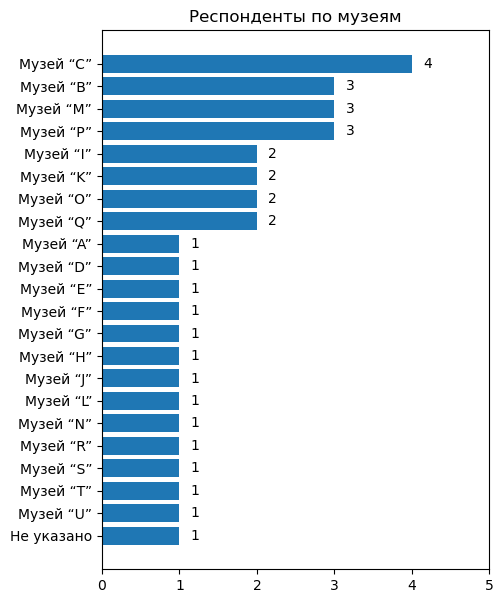

In [104]:
figsize = (5,7)
fig, ax = plt.subplots(figsize=figsize)

plt.barh(pivot.index, pivot['Итого'])
plt.xticks(np.arange(0, 6, 1))

for i, v in enumerate(pivot['Итого']):
    ax.text(v + 0.2, i, str(v), ha='center', va='center')

plt.title('Респонденты по музеям')

\
Посмотрим на количество респондентов по музеям и должностям

In [119]:
pivot_heatmap = df.pivot_table(index='Музей', columns='Ваша должность', values='ID', aggfunc='count',  margins=True, margins_name='Итого')
pivot_heatmap = pivot_heatmap.sort_values(['Итого', 'Музей'], ascending=[False, True])
pivot_heatmap = pivot_heatmap.reindex(columns=['Администратор', 'Методист', 'Начальник музея', 'Заместитель начальника', 'Куратор'])
pivot_heatmap = pivot_heatmap.drop(pivot_heatmap.index[0])
pivot_heatmap

Ваша должность,Администратор,Методист,Начальник музея,Заместитель начальника,Куратор
Музей,,,,,
Музей “C”,3.0,NaN,1.0,NaN,NaN
Музей “B”,1.0,1.0,1.0,NaN,NaN
Музей “M”,2.0,NaN,1.0,NaN,NaN
Музей “P”,1.0,1.0,NaN,1.0,NaN
Музей “I”,NaN,2.0,NaN,NaN,NaN
Музей “K”,NaN,1.0,1.0,NaN,NaN
Музей “O”,NaN,1.0,1.0,NaN,NaN
Музей “Q”,1.0,1.0,NaN,NaN,NaN
Музей “A”,NaN,NaN,NaN,1.0,NaN


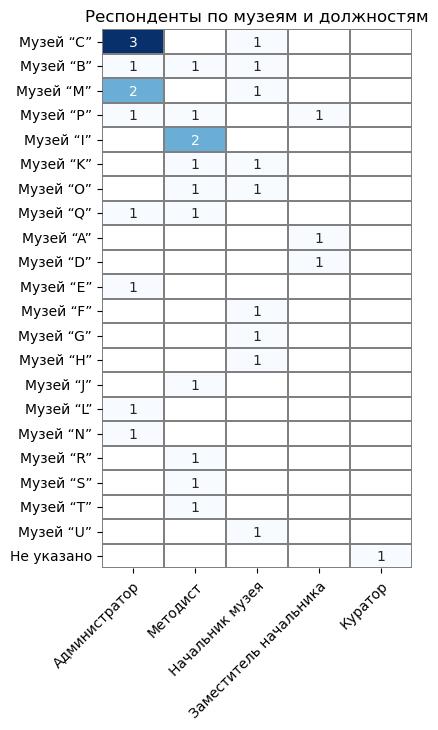

In [92]:
figsize = (4,7)
fig, ax = plt.subplots(figsize=figsize)

hmap = sns.heatmap(pivot_heatmap, 
                   ax=ax, 
                   linewidth=0.1,
                   linecolor='gray',
                   annot=True,
                   cmap='Blues',
                   cbar=False)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.ylabel('')
plt.xlabel('')

plt.title('Респонденты по музеям и должностям')
plt.show()

#### 4.1 Проблемы при составлении документов (Варианты)

Для начала преобразуем горизонтальную таблицу в вертикальную

In [75]:
melted_df = pd.melt(df, id_vars=['ID'], value_vars=['С какими проблемами Вы сталкиваетесь при составлении документов / Необходимость вносить повторяющуюся информацию в разные документы',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Отсутствие базы шаблонов и долгий поиск нужной формы документа',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Ошибки на этапе согласования и внесение правок задерживают процесс подготовки выставки / мероприятия',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Долгий процесс согласования документов',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Рутинная работа занимает много времени и не позволяет заниматься основной деятельностью',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Появляется чувство усталости и истощения при заполнении типовых документов',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Проблем не возникает',
                                                    'С какими проблемами Вы сталкиваетесь при составлении документов / Другое'
                                                   ])
melted_df = melted_df.drop(columns='variable')
melted_df

,ID,value
0,1627422744,NaN
1,1660996475,Необходимость вносить повторяющуюся информацию...
2,1664038256,Необходимость вносить повторяющуюся информацию...
3,1664039643,NaN
4,1664044594,Необходимость вносить повторяющуюся информацию...
...,...,...
275,1667726198,NaN
276,1668097053,NaN
277,1669460393,NaN
278,1671944504,NaN


\
Теперь мы можем построить сводную таблицу с показателями ответов и понять, с какими проблемами сталкиваются сотрудники

In [49]:
pivot_melt = melted_df[['value', 'ID']].groupby('value').count().sort_values(by='ID', ascending=False)

pivot_melt = pivot_melt.reset_index().rename(columns={'value': 'С какими проблемами Вы сталкиваетесь при составлении документов?', 
                                                      'ID': 'Ответы'})

pivot_melt['Доля'] = round(pivot_melt['Ответы'] / pivot_melt.Ответы.sum(), 2)


pivot_melt

,С какими проблемами Вы сталкиваетесь при составлении документов?,Ответы,Доля
0,Необходимость вносить повторяющуюся информацию...,21,0.20
1,Долгий процесс согласования документов,18,0.17
2,Отсутствие базы шаблонов и долгий поиск нужной...,16,0.15
3,Ошибки на этапе согласования и внесение правок...,16,0.15
4,Рутинная работа занимает много времени и не по...,14,0.13
5,Появляется чувство усталости и истощения при з...,10,0.09
6,Другое,6,0.06
7,Проблем не возникает,5,0.05


\
**Выводы:**
* У большинства респондентов возникают проблемы при составлении документов (95% против 5%).
* В топ 3 верхних позиций вошли 2 проблемы, которые можно решить с помощью шаблонизатора документов (индексы 0 и 2).

#### 4.2 Проблемы при составлении документов (Другое)

Посмотрим, с какими еще проблемами сталкиваются сотрудники.

In [70]:
trable_doc = df["Укажите другие проблемы"].dropna()
trable_doc

2     Разная информация от разных отделов. В некотор...
15    Если  в формы договоров/контрактов вносятся ка...
21    1. Много времени уходит на "вытягивание" необх...
23    Партнеры не присылают вовремя информацию или н...
26    Много времени занимает сбор данных от участник...
Name: Укажите другие проблемы, dtype: object

\
Сохраним результат в csv и прогоним через GPT для суммаризации.

In [72]:
trable_doc.to_csv('trable_doc.csv', sep=',', index=False, encoding='utf-8')

\
**После работы с нейросетью мы можем понять основные проблемы, которыми поделились респонденты:**

* Разногласия в шаблонах документов между бэк-офисом и институцией вызывают задержки и путаницу.
* Длительное ожидание и неполные данные от партнеров требуют дополнительных усилий и времени.

Эти проблемы существенно усложняют и затягивают процесс подготовки документов.

Мы снова видим, что разногласия в шаблонах документов решит система автоматизации документооборота.

### Выводы

Система автоматизации документооборота нужна